In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

In [2]:
df_Train=pd.read_csv('Titanic Train.csv')
df_Test=pd.read_csv('Titanic test.csv')

In [3]:
df_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(df_Train.shape)
print(df_Test.shape)

(891, 12)
(418, 11)


In [6]:
df=df_Train.append(df_Test,sort=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [9]:
df['Embarked']=df['Embarked'].fillna("S")
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [10]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [11]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
df.Cabin.value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F2                 4
B96 B98            4
                  ..
C132               1
A10                1
B30                1
B73                1
B4                 1
Name: Cabin, Length: 186, dtype: int64

In [13]:
df['Cabin'] = df['Cabin'].fillna('U')

In [14]:
import re
df['Cabin'] = df['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())

In [15]:
df['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [16]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
df['Cabin'] = df['Cabin'].map(cabin_category)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,9,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,3,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,9,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,9,S


In [18]:
df['Name'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [19]:
df['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [20]:
df['Name'] = df['Name'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [21]:
df['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [23]:
df["Name"]=encoder.fit_transform(df['Name'])
df["Sex"]=encoder.fit_transform(df['Sex'])
df["Embarked"]=encoder.fit_transform(df['Embarked'])

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,2,1,22.0,1,0,A/5 21171,7.2500,9,2
1,2,1.0,1,3,0,38.0,1,0,PC 17599,71.2833,3,0
2,3,1.0,3,1,0,26.0,0,0,STON/O2. 3101282,7.9250,9,2
3,4,1.0,1,3,0,35.0,1,0,113803,53.1000,3,2
4,5,0.0,3,2,1,35.0,0,0,373450,8.0500,9,2


In [25]:
df.drop('Ticket', axis=1, inplace=True)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,2,1,22.0,1,0,7.2500,9,2
1,2,1.0,1,3,0,38.0,1,0,71.2833,3,0
2,3,1.0,3,1,0,26.0,0,0,7.9250,9,2
3,4,1.0,1,3,0,35.0,1,0,53.1000,3,2
4,5,0.0,3,2,1,35.0,0,0,8.0500,9,2


In [27]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name             int32
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin            int64
Embarked         int32
dtype: object

In [28]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.038354,0.040450,0.013406,0.025731,-0.055224,0.008942,0.031416,-0.007884,-0.051977
Survived,-0.005007,1.000000,-0.338481,-0.052471,-0.543351,-0.070323,-0.035322,0.081629,0.257307,-0.301116,-0.167675
Pclass,-0.038354,-0.338481,1.000000,-0.217526,0.124617,-0.366371,0.060832,0.018322,-0.558477,0.734749,0.185479
Name,0.040450,-0.052471,-0.217526,1.000000,0.006723,0.471463,-0.196323,-0.091059,0.027215,-0.153456,-0.033379
Sex,0.013406,-0.543351,0.124617,0.006723,1.000000,0.057397,-0.109609,-0.213125,-0.185484,0.125487,0.097960
Age,0.025731,-0.070323,-0.366371,0.471463,0.057397,1.000000,-0.190747,-0.130872,0.171521,-0.293861,-0.071181
SibSp,-0.055224,-0.035322,0.060832,-0.196323,-0.109609,-0.190747,1.000000,0.373587,0.160224,0.007952,0.065567
Parch,0.008942,0.081629,0.018322,-0.091059,-0.213125,-0.130872,0.373587,1.000000,0.221522,-0.034438,0.044772
Fare,0.031416,0.257307,-0.558477,0.027215,-0.185484,0.171521,0.160224,0.221522,1.000000,-0.547236,-0.237970
Cabin,-0.007884,-0.301116,0.734749,-0.153456,0.125487,-0.293861,0.007952,-0.034438,-0.547236,1.000000,0.231319


In [29]:
#df.drop('Sex', axis=1, inplace=True)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

columns_to_scale = ['Fare', 'Age', 'PassengerId']
df[columns_to_scale] = sc.fit_transform(df[columns_to_scale])

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,-1.730728,0.0,3,2,1,-0.611972,1,0,-0.503595,9,2
1,-1.728082,1.0,1,3,0,0.630431,1,0,0.734503,3,0
2,-1.725435,1.0,3,1,0,-0.301371,0,0,-0.490544,9,2
3,-1.722789,1.0,1,3,0,0.397481,1,0,0.382925,3,2
4,-1.720143,0.0,3,2,1,0.397481,0,0,-0.488127,9,2


In [32]:
df_train=df[0:891]
df_test=df[891:]

In [33]:
df_train['Survived']=df_train['Survived'].astype(int)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,-1.730728,0,3,2,1,-0.611972,1,0,-0.503595,9,2
1,-1.728082,1,1,3,0,0.630431,1,0,0.734503,3,0
2,-1.725435,1,3,1,0,-0.301371,0,0,-0.490544,9,2
3,-1.722789,1,1,3,0,0.397481,1,0,0.382925,3,2
4,-1.720143,0,3,2,1,0.397481,0,0,-0.488127,9,2


In [35]:
df_test=df_test.drop(['Survived'],axis=1)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.627190,3,2,1,0.358655,0,0,-0.492396,9,1
1,0.629837,3,3,0,1.329283,1,0,-0.508429,9,2
2,0.632483,2,2,1,2.494035,0,0,-0.456465,9,1
3,0.635130,3,2,1,-0.223721,0,0,-0.476284,9,2
4,0.637776,3,3,0,-0.611972,1,1,-0.406194,9,2


In [36]:
print(df_train.shape)
print(df_test.shape)

(891, 11)
(418, 10)


In [37]:
X=df_train.drop(['Survived'],axis=1)
y=df_train[['Survived']]

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.21322,random_state=6)

In [53]:
from catboost import CatBoostClassifier
CB = CatBoostClassifier(iterations=14,eval_metric="F1",
                                    learning_rate=0.3018,depth=4)


CB.fit(X_train, y_train,eval_set=(X_test, y_test))

0:	learn: 0.7266055	test: 0.7611940	best: 0.7611940 (0)	total: 1.23ms	remaining: 15.9ms
1:	learn: 0.7072243	test: 0.7424242	best: 0.7611940 (0)	total: 2.1ms	remaining: 12.6ms
2:	learn: 0.7441860	test: 0.7936508	best: 0.7936508 (2)	total: 2.95ms	remaining: 10.8ms
3:	learn: 0.7345309	test: 0.7936508	best: 0.7936508 (2)	total: 3.74ms	remaining: 9.35ms
4:	learn: 0.7407407	test: 0.8125000	best: 0.8125000 (4)	total: 4.59ms	remaining: 8.26ms
5:	learn: 0.7604563	test: 0.8000000	best: 0.8125000 (4)	total: 5.46ms	remaining: 7.28ms
6:	learn: 0.7580952	test: 0.8000000	best: 0.8125000 (4)	total: 6.64ms	remaining: 6.64ms
7:	learn: 0.7728155	test: 0.7906977	best: 0.8125000 (4)	total: 7.53ms	remaining: 5.65ms
8:	learn: 0.7734375	test: 0.7936508	best: 0.8125000 (4)	total: 8.39ms	remaining: 4.66ms
9:	learn: 0.7728155	test: 0.7906977	best: 0.8125000 (4)	total: 9.24ms	remaining: 3.7ms
10:	learn: 0.7758285	test: 0.8000000	best: 0.8125000 (4)	total: 10.7ms	remaining: 2.92ms
11:	learn: 0.7764706	test: 0.8000

In [54]:
pred = CB.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

0.8736842105263158
[[113   7]
 [ 17  53]]


In [55]:
y_score1 = CB.predict_proba(X_test)[:,1]

roc_auc_score for Catboost:  0.8746428571428572


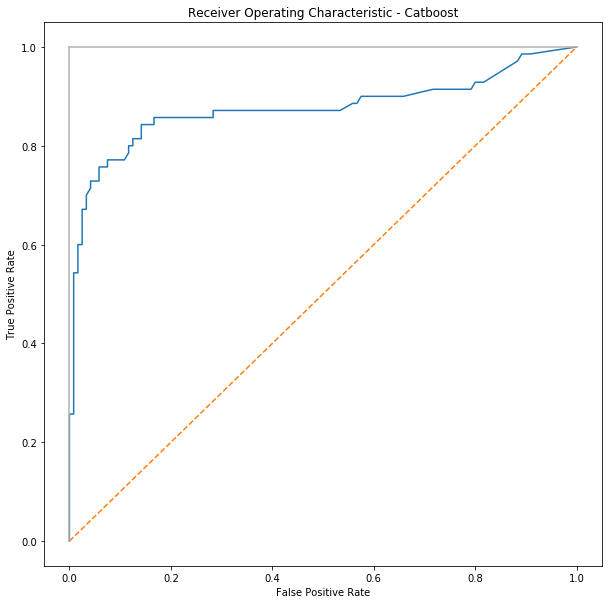

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

print('roc_auc_score for Catboost: ', roc_auc_score(y_test, y_score1))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Catboost')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"),plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [57]:
prediction = CB.predict(df_test)
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [58]:
output = pd.DataFrame({'PassengerId': df_Test.PassengerId, 'Survived': prediction})
output.to_csv('titanic2020.csv', index=False)